In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import numpy as np

dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [ ]:
data_train, data_test = tf.keras.utils.image_dataset_from_directory(directory=data_dir,batch_size=16, subset='both', seed=2, 
                                            image_size=(256,256), crop_to_aspect_ratio=True, 
                                            shuffle=True,validation_split=0.2, labels='inferred', label_mode='categorical')

In [ ]:
X_batch, y_batch = next(iter(data_test))

def plot_image_grid(image_data, rows, cols):
    fig, axs = plt.subplots(nrows=4,ncols=4)
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(X_batch[i * 4 + j] / 255)
            axs[i, j].title.set_text(data_test.class_names[tf.argmax(y_batch[i * 4 + j])])

plt.show()


In [ ]:
# augmentation block
block = tf.keras.Sequential()
block.add(tf.keras.layers.RandomFlip(mode='horizontal'))
block.add(tf.keras.layers.RandomRotation(factor=0.1))
block.add(tf.keras.layers.RandomZoom(height_factor=0.2))
block.add(tf.keras.layers.RandomBrightness(factor=0.2))

result = block(X_batch)

plot_image_grid(result, rows=4, cols=4)

In [ ]:
# feature extraction
feature_extraction = tf.keras.Sequential()
feature_extraction.add(tf.keras.layers.Conv2D(kernel_size=(3,3),filters=16, activation='relu'))
feature_extraction.add(tf.keras.layers.MaxPooling2D())

feature_extraction.add(tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu'))
feature_extraction.add(tf.keras.layers.MaxPooling2D())

feature_extraction.add(tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64, activation='relu'))
feature_extraction.add(tf.keras.layers.MaxPooling2D())

feature_extraction.add(tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128, activation='relu'))
feature_extraction.add(tf.keras.layers.MaxPooling2D())

# classification
classification = tf.keras.Sequential()
classification.add(tf.keras.layers.Dense(units=32, activation='relu'))
classification.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# main CNN model
main_model = tf.keras.Sequential()
main_model.add(tf.keras.layers.Input(shape=(256,256,3)))
main_model.add(block)
main_model.add(tf.keras.layers.Rescaling(scale=1./255))
main_model.add(feature_extraction)
main_model.add(tf.keras.layers.Flatten())
main_model.add(classification)

main_model.summary(expand_nested=True)

Epoch 1/10
46/46 [==============================] - 36s 744ms/step - loss: 1.5876 - categorical_accuracy: 0.2548 - val_loss: 1.4490 - val_categorical_accuracy: 0.3338
Epoch 2/10
46/46 [==============================] - 31s 687ms/step - loss: 1.3696 - categorical_accuracy: 0.4183 - val_loss: 1.2685 - val_categorical_accuracy: 0.4319
Epoch 3/10
46/46 [==============================] - 32s 703ms/step - loss: 1.2747 - categorical_accuracy: 0.4346 - val_loss: 1.1794 - val_categorical_accuracy: 0.5204
Epoch 4/10
46/46 [==============================] - 34s 753ms/step - loss: 1.1883 - categorical_accuracy: 0.5177 - val_loss: 1.0762 - val_categorical_accuracy: 0.5695
Epoch 5/10
46/46 [==============================] - 36s 782ms/step - loss: 1.0676 - categorical_accuracy: 0.5668 - val_loss: 1.0069 - val_categorical_accuracy: 0.6090
Epoch 6/10
46/46 [==============================] - 47s 1s/step - loss: 1.0267 - categorical_accuracy: 0.5817 - val_loss: 0.9406 - val_categorical_accuracy: 0.6104
E

Text(0.5, 1.0, 'Accuracy Curves')

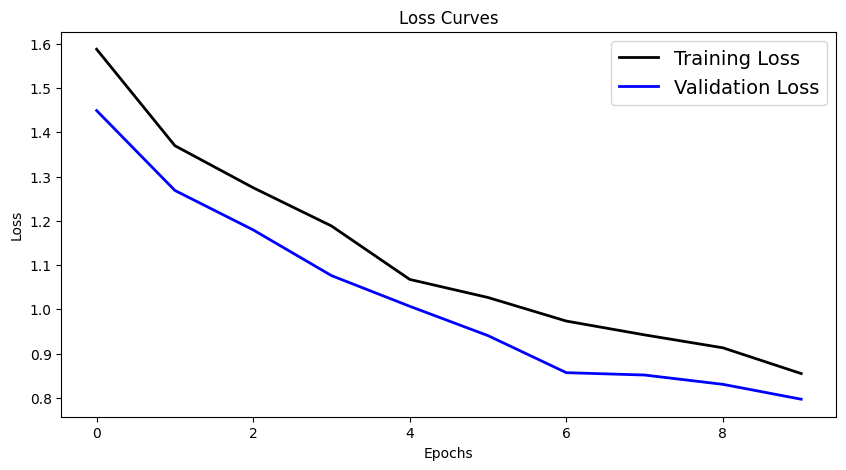

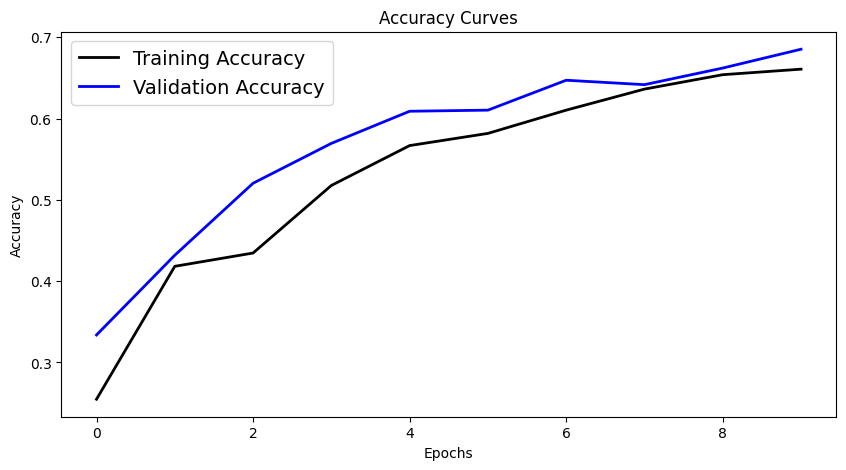

In [24]:
main_model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = tf.keras.losses.CategoricalCrossentropy(), 
              metrics = tf.keras.metrics.CategoricalAccuracy())

history = main_model.fit(data_test, epochs= 10, validation_data=(data_test))

plt.figure(figsize=[10,5])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

plt.figure(figsize=[10,5])
plt.plot(history.history['categorical_accuracy'], 'black', linewidth=2.0)  
plt.plot(history.history['val_categorical_accuracy'], 'blue', linewidth=2.0)  
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)